# Individual Assignment 1

## Planning Stage: Data Description & Exploratory Data Analysis and Visualization             - Selina Chen

### Data Description

Heart Disease Dataset

This heart disease dataset is based on the combination of Cleveland database and Hungarian database, the Cleveland dataset has been processed and the Hungarian database has been reprocessed. The dataset was downloaded from the UCI website. It contains 14 attributes. So the dataset consists of 14 columns representing features and variables related to heart disease and predicted attribute. The Cleveland dataset has 303 observations as selected patients, after dropped out the missing value in ca and thal, there are 297 patients. The Hungarian dataset has 294 patients. After combined two databases, there are total 591 patients as our observations. The "goal" field refers to the presence of heart disease in the patient as two outcomes 0 (absence) and 1(presence), we will treat the valued 1,2,3,4 as the outcome group 1 (the presence of heart disease). 

### Variable Information
| Variable | Type | Description |
| :------- | :-- | :-----------|
| age | Interger | Age of individual |
| sex | Categorical | Sex (0 = female, 1 = male) |
| cp | Categorical | Chest pain level (1 to 4) |
| trestbps | Integer | Resting blood pressure (in mm Hg) |
| chol | Integer | Serum cholesterol in mg/dl |
| fbs | Categorical | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| restecg | Categorical | Resting electrocardiographic level (0 to 2) |
| thalach | Integer | Maximum heart rate achieved |
| exang | Categorical | Exercise-induced angina (1 = yes, 0 = no) |
| oldpeak | Integer | ST depression induced by exercise relative to rest |
| slope | Categorical | Slope of the peak exercise ST segment (1 to 3) |
| ca | Integer | Number of major vessels (0–4) colored by fluoroscopy |
| thal | Categorical | Thalassemia type (1 = normal; 2 = fixed defect; 3 = reversible defect) |
| Num | Categorical | Diagnosis of heart disease (1 = presence of heart disease; 0 = absence of heart disease)|


This heart disease dataset downloaded from UC Irvine Machine Learning Repository, it comes from the Cleveland database and it has been processed. The link to the dataset provided below.
Links: https://archive.ics.uci.edu/dataset/45/heart+disease

### Question

Research Question: Given the features of age, sex, chest pain types, serum cholesterol, and resting blood pressure of patients, can we predict the presence or absence of heart disease in patients?

We are interested in predicting whether or not a patient has heart disease given selected features that may be related to it. So our primary goal is to predict the presence of heart disease in patients. The response variable is num (Diganosis of heart disease), although there are 5 values from 0 to 4, but we will treat this as two outcomes, whether 0 is the absence of heart disease, and recorded (1,2,3,4) as 1 is the presence of heart disease, no matter the severity level of heart disease. The explanatory variables are age, sex, chest pain types, serum cholesterol and resting blood pressure. But we may use other explanatory variables as we would use the variables selection algorithm to select the best model and variables that will help improve the prediction accuracy. Therefore, this research question is focused on prediction. We will use the data to estimate the coefficients for our selected model and also explore the association between these explanatory variables and response variable. Then we will use the forward selection algorithm to select the appropriate explanatory variables in order to improve the prediction accuracy. Finally we will make predictions use our prediction models and analyze the results to answer our research question. 

### Exploratory Data Analysis and Visualization

In [1]:
#Load dataset
set.seed(1)
library(dplyr)
library(readxl)
library(tidyverse)
library(glmnet)
library(broom)
library(leaps)
library(repr)
library(faraway)
library(mltools)
library(GGally)
library(ggplot2)
library(ggpubr)

heart_disease_data_cleveland <- read_csv("/home/jovyan/work/stat-301/Selina_Stat301_GroupProject/processed.cleveland.data", col_names = FALSE, na = c("?"))%>%
setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
mutate(sex = as_factor(sex) ,cp = as_factor(cp) ,fbs = as_factor(fbs),restecg = as_factor(restecg),
exang = as_factor(exang),slope = as_factor(slope),thal = as_factor(thal)) %>%
drop_na(ca)%>%
drop_na(thal)%>%
mutate(num = ifelse(num %in% c(1, 2, 3, 4), 1, 0))%>%#Convert num to binary response where 0(absence),1(1,2,3,4)(Presence)
mutate(num = as_factor(num))

heart_disease_data_cleveland


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


Registered S3 method overw

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0  6   
2   67  1   4  160      286  0   2       108     1     1.5     2     3  3   
3   67  1   4  120      229  0   2       129     1     2.6     2     2  7   
4   37  1   3  130      250  0   0       187     0     3.5     3     0  3   
5   41  0   2  130      204  0   2       172     0     1.4     1     0  3   
6   56  1   2  120      236  0   0       178     0     0.8     1     0  3   
7   62  0   4  140      268  0   2       160     0     3.6     3     2  3   
8   57  0   4  120      354  0   0       163     1     0.6     1     0  3   
9   63  1   4  130      254  0   2       147     0     1.4     2     1  7   
10  53  1   4  140      203  1   2       155     1     3.1     3     0  7   
11  57  1   4  140      192  0   0       148     0     0.4     2     0  6   
12  56  0   2  140      294  0   2       153     0     1.3     2     0  3   
13  56  1   3  130      256  1   2       142     1     0.6     2     1  6   
14  44  1   2  120      263  0   0       173     0     0.0     1     0  7   
15  52  1   3  172      199  1   0       162     0     0.5     1     0  7   
16  57  1   3  150      168  0   0       174     0     1.6     1     0  3   
17  48  1   2  110      229  0   0       168     0     1.0     3     0  7   
18  54  1   4  140      239  0   0       160     0     1.2     1     0  3   
19  48  0   3  130      275  0   0       139     0     0.2     1     0  3   
20  49  1   2  130      266  0   0       171     0     0.6     1     0  3   
21  64  1   1  110      211  0   2       144     1     1.8     2     0  3   
22  58  0   1  150      283  1   2       162     0     1.0     1     0  3   
23  58  1   2  120      284  0   2       160     0     1.8     2     0  3   
24  58  1   3  132      224  0   2       173     0     3.2     1     2  7   
25  60  1   4  130      206  0   2       132     1     2.4     2     2  7   
26  50  0   3  120      219  0   0       158     0     1.6     2     0  3   
27  58  0   3  120      340  0   0       172     0     0.0     1     0  3   
28  66  0   1  150      226  0   0       114     0     2.6     3     0  3   
29  43  1   4  150      247  0   0       171     0     1.5     1     0  3   
30  40  1   4  110      167  0   2       114     1     2.0     2     0  7   
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
268 66  1   4  160      228  0   2       138     0     2.3     1     0  6   
269 46  1   4  140      311  0   0       120     1     1.8     2     2  7   
270 71  0   4  112      149  0   0       125     0     1.6     2     0  3   
271 59  1   1  134      204  0   0       162     0     0.8     1     2  3   
272 64  1   1  170      227  0   2       155     0     0.6     2     0  7   
273 66  0   3  146      278  0   2       152     0     0.0     2     1  3   
274 39  0   3  138      220  0   0       152     0     0.0     2     0  3   
275 57  1   2  154      232  0   2       164     0     0.0     1     1  3   
276 58  0   4  130      197  0   0       131     0     0.6     2     0  3   
277 57  1   4  110      335  0   0       143     1     3.0     2     1  7   
278 47  1   3  130      253  0   0       179     0     0.0     1     0  3   
279 55  0   4  128      205  0   1       130     1     2.0     2     1  7   
280 35  1   2  122      192  0   0       174     0     0.0     1     0  3   
281 61  1   4  148      203  0   0       161     0     0.0     1     1  7   
282 58  1   4  114      318  0   1       140     0     4.4     3     3  6   
283 58  0   4  170      225  1   2       146     1     2.8     2     2  6   
284 56  1   2  130      221  0   2       163     0     0.0     1     0  7   
285 56  1   2  120      240  0   0       169     0     0.0     3     0  3   
286 67  1   3  152      212  0   2       150     0     0.8     2     0  7   
287 55  0   2  132      342  0   0       166     0     1.2     1     0  3   


In [2]:
heart_disease_data_hun <- read.table("/home/jovyan/work/stat-301/Selina_Stat301_GroupProject/reprocessed.hungarian.data",sep = "" ,,na = c("?"))%>%
setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))%>%
mutate(sex = as_factor(sex) ,cp = as_factor(cp) ,fbs = as_factor(fbs),restecg = as_factor(restecg),
exang = as_factor(exang),slope = as_factor(slope),thal = as_factor(thal)) %>%
drop_na(ca)%>%
drop_na(thal)%>%
mutate(num = ifelse(num %in% c(1, 2, 3, 4), 1, 0))%>%#Convert num to binary response where 0(absence),1(1,2,3,4)(Presence)
mutate(num = as_factor(num))

heart_disease_data_hun

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1   40  1   2  140      289  0   0       172     0     0.0     -9    -9 -9  
2   49  0   3  160      180  0   0       156     0     1.0     2     -9 -9  
3   37  1   2  130      283  0   1        98     0     0.0     -9    -9 -9  
4   48  0   4  138      214  0   0       108     1     1.5     2     -9 -9  
5   54  1   3  150       -9  0   0       122     0     0.0     -9    -9 -9  
6   39  1   3  120      339  0   0       170     0     0.0     -9    -9 -9  
7   45  0   2  130      237  0   0       170     0     0.0     -9    -9 -9  
8   54  1   2  110      208  0   0       142     0     0.0     -9    -9 -9  
9   37  1   4  140      207  0   0       130     1     1.5     2     -9 -9  
10  48  0   2  120      284  0   0       120     0     0.0     -9    -9 -9  
11  37  0   3  130      211  0   0       142     0     0.0     -9    -9 -9  
12  58  1   2  136      164  0   1        99     1     2.0     2     -9 -9  
13  39  1   2  120      204  0   0       145     0     0.0     -9    -9 -9  
14  49  1   4  140      234  0   0       140     1     1.0     2     -9 -9  
15  42  0   3  115      211  0   1       137     0     0.0     -9    -9 -9  
16  54  0   2  120      273  0   0       150     0     1.5     2     -9 -9  
17  38  1   4  110      196  0   0       166     0     0.0     -9    -9 -9  
18  43  0   2  120      201  0   0       165     0     0.0     -9    -9 -9  
19  60  1   4  100      248  0   0       125     0     1.0     2     -9 -9  
20  36  1   2  120      267  0   0       160     0     3.0     2     -9 -9  
21  43  0   1  100      223  0   0       142     0     0.0     -9    -9 -9  
22  44  1   2  120      184  0   0       142     0     1.0     2     -9 -9  
23  49  0   2  124      201  0   0       164     0     0.0     -9    -9 -9  
24  44  1   2  150      288  0   0       150     1     3.0     2     -9 -9  
25  40  1   3  130      215  0   0       138     0     0.0     -9    -9 -9  
26  36  1   3  130      209  0   0       178     0     0.0     -9    -9 -9  
27  53  1   4  124      260  0   1       112     1     3.0     2     -9 -9  
28  52  1   2  120      284  0   0       118     0     0.0     -9    -9 -9  
29  53  0   2  113      468  -9  0       127     0     0.0     -9    -9 -9  
30  51  1   2  125      188  0   0       145     0     0.0     -9    -9 -9  
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
265 59  1   4  130       -9  0   0       125     0     0.0     -9    -9 -9  
266 47  1   3  140      193  0   0       145     1     1.0     2     -9 -9  
267 54  1   2  160      305  0   0       175     0     0.0     -9    -9 -9  
268 52  1   4  130      298  0   0       110     1     1.0     2     -9 -9  
269 34  1   2   98      220  0   0       150     0     0.0     -9    -9 -9  
270 54  1   4  130      242  0   0        91     1     1.0     2     -9 -9  
271 47  0   3  130       -9  0   0       145     0     2.0     2     -9 -9  
272 45  1   4  120      225  0   0       140     0     0.0     -9    -9 -9  
273 32  0   2  105      198  0   0       165     0     0.0     -9    -9 -9  
274 55  1   4  140      201  0   0       130     1     3.0     2     -9 -9  
275 55  1   3  120      220  0   2       134     0     0.0     -9    -9 -9  
276 45  0   2  180       -9  0   0       180     0     0.0     -9    -9 -9  
277 59  1   3  180      213  0   0       100     0     0.0     -9    -9 -9  
278 51  1   3  135      160  0   0       150     0     2.0     2     -9 -9  
279 52  1   4  170       -9  0   0       126     1     1.5     2     -9 -9  
280 57  0   4  180      347  0   1       126     1     0.8     2     -9 -9  
281 54  0   2  130      253  0   1       155     0     0.0     -9    -9 -9  
282 60  1   3  120      246  0   2       135     0     0.0     -9    -9 -9  
283 49  1   4  150      222  0   0       122     0     2.0     2     -9 -9  
284 51  0   3  130      220  0   0       160     1     2.0     1     -9 -9  


In [3]:
#Combined two datasets
heart_disease_data <- rbind(heart_disease_data_cleveland, heart_disease_data_hun)
heart_disease_data

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0  6   
2   67  1   4  160      286  0   2       108     1     1.5     2     3  3   
3   67  1   4  120      229  0   2       129     1     2.6     2     2  7   
4   37  1   3  130      250  0   0       187     0     3.5     3     0  3   
5   41  0   2  130      204  0   2       172     0     1.4     1     0  3   
6   56  1   2  120      236  0   0       178     0     0.8     1     0  3   
7   62  0   4  140      268  0   2       160     0     3.6     3     2  3   
8   57  0   4  120      354  0   0       163     1     0.6     1     0  3   
9   63  1   4  130      254  0   2       147     0     1.4     2     1  7   
10  53  1   4  140      203  1   2       155     1     3.1     3     0  7   
11  57  1   4  140      192  0   0       148     0     0.4     2     0  6   
12  56  0   2  140      294  0   2       153     0     1.3     2     0  3   
13  56  1   3  130      256  1   2       142     1     0.6     2     1  6   
14  44  1   2  120      263  0   0       173     0     0.0     1     0  7   
15  52  1   3  172      199  1   0       162     0     0.5     1     0  7   
16  57  1   3  150      168  0   0       174     0     1.6     1     0  3   
17  48  1   2  110      229  0   0       168     0     1.0     3     0  7   
18  54  1   4  140      239  0   0       160     0     1.2     1     0  3   
19  48  0   3  130      275  0   0       139     0     0.2     1     0  3   
20  49  1   2  130      266  0   0       171     0     0.6     1     0  3   
21  64  1   1  110      211  0   2       144     1     1.8     2     0  3   
22  58  0   1  150      283  1   2       162     0     1.0     1     0  3   
23  58  1   2  120      284  0   2       160     0     1.8     2     0  3   
24  58  1   3  132      224  0   2       173     0     3.2     1     2  7   
25  60  1   4  130      206  0   2       132     1     2.4     2     2  7   
26  50  0   3  120      219  0   0       158     0     1.6     2     0  3   
27  58  0   3  120      340  0   0       172     0     0.0     1     0  3   
28  66  0   1  150      226  0   0       114     0     2.6     3     0  3   
29  43  1   4  150      247  0   0       171     0     1.5     1     0  3   
30  40  1   4  110      167  0   2       114     1     2.0     2     0  7   
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
562 59  1   4  130       -9  0   0       125     0     0.0     -9    -9 -9  
563 47  1   3  140      193  0   0       145     1     1.0     2     -9 -9  
564 54  1   2  160      305  0   0       175     0     0.0     -9    -9 -9  
565 52  1   4  130      298  0   0       110     1     1.0     2     -9 -9  
566 34  1   2   98      220  0   0       150     0     0.0     -9    -9 -9  
567 54  1   4  130      242  0   0        91     1     1.0     2     -9 -9  
568 47  0   3  130       -9  0   0       145     0     2.0     2     -9 -9  
569 45  1   4  120      225  0   0       140     0     0.0     -9    -9 -9  
570 32  0   2  105      198  0   0       165     0     0.0     -9    -9 -9  
571 55  1   4  140      201  0   0       130     1     3.0     2     -9 -9  
572 55  1   3  120      220  0   2       134     0     0.0     -9    -9 -9  
573 45  0   2  180       -9  0   0       180     0     0.0     -9    -9 -9  
574 59  1   3  180      213  0   0       100     0     0.0     -9    -9 -9  
575 51  1   3  135      160  0   0       150     0     2.0     2     -9 -9  
576 52  1   4  170       -9  0   0       126     1     1.5     2     -9 -9  
577 57  0   4  180      347  0   1       126     1     0.8     2     -9 -9  
578 54  0   2  130      253  0   1       155     0     0.0     -9    -9 -9  
579 60  1   3  120      246  0   2       135     0     0.0     -9    -9 -9  
580 49  1   4  150      222  0   0       122     0     2.0     2     -9 -9  
581 51  0   3  130      220  0   0       160     1     2.0     1     -9 -9  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


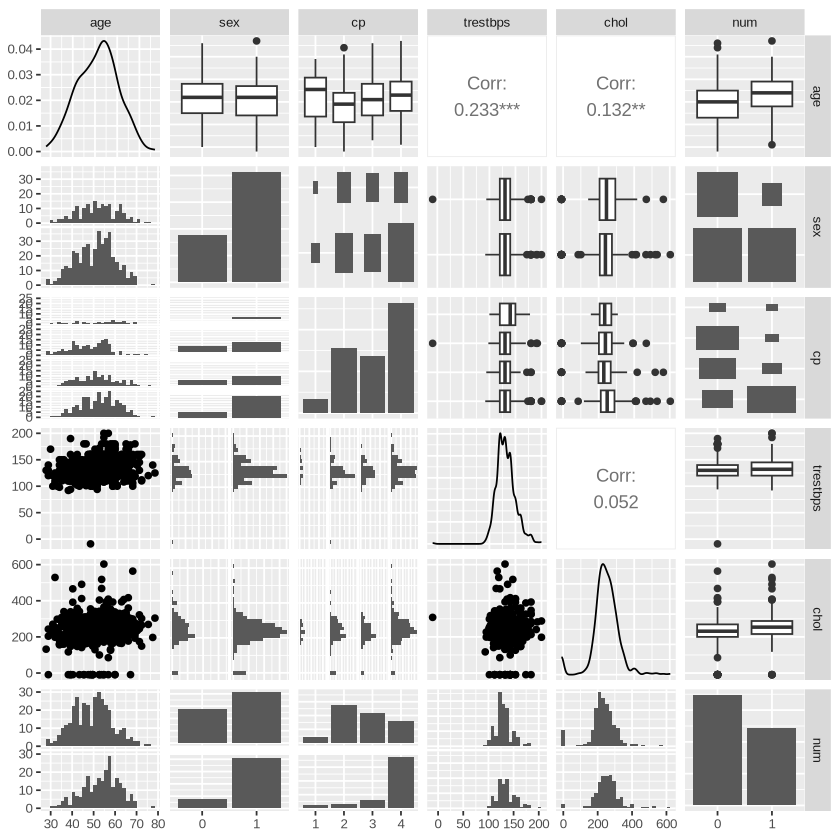

In [4]:
#ggpairs to see the relationships between variables and response variable(Heart Disease)
heart_disease_data_pairplots <- 
    heart_disease_data[, c("age", "sex", "cp","trestbps","chol","num")]%>%
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        
    )

heart_disease_data_pairplots

* Above ggpairs plot is useful when exploring the relationship between selected predictors (age,sex,cp trestbps,chol) and response variable(num;the diagnosis of heart disease), it can help to find the relevant predictors that may use to predict the diagnosis of heart disease. We can see that these variables are correlated with heart disease. There is no negative relationship.

In [5]:
#Sex and Heart Disease
plot_1 <- ggplot(heart_disease_data, aes(x = sex, fill =factor(num)))+ 
geom_bar()+
labs(title = "Sex and Heart Disease",
     x = "Sex",
     fill = "Heart Disease")+
    theme_minimal()+
    scale_fill_manual(labels = c("No(0)",'Yes(1)'),values = c("0" = "cornflowerblue","1" = "coral1"))

In [6]:
#Chest Pain Type and Heart Disease
plot_2 <- ggplot(heart_disease_data, aes(x = cp, fill =factor(num)))+ 
geom_bar()+
labs(title = "Chest Pain Type and Heart Disease",
     x = "Chest Pain Type",
     fill = "Heart Disease")+
    theme_minimal()+
    scale_fill_manual(labels = c("No(0)",'Yes(1)'),values = c("0" = "cornflowerblue","1" = "coral1"))

In [7]:
#Age and Heart Disease
plot_3 <- ggplot(heart_disease_data, aes(x = age, fill =factor(num)))+ 
geom_bar()+
labs(title = "Age and Heart Disease",
     x = "Age",
     fill = "Heart Disease")+
     theme_minimal()+
    scale_fill_manual(labels = c("No(0)",'Yes(1)'),values = c("0" = "cornflowerblue","1" = "coral1"))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

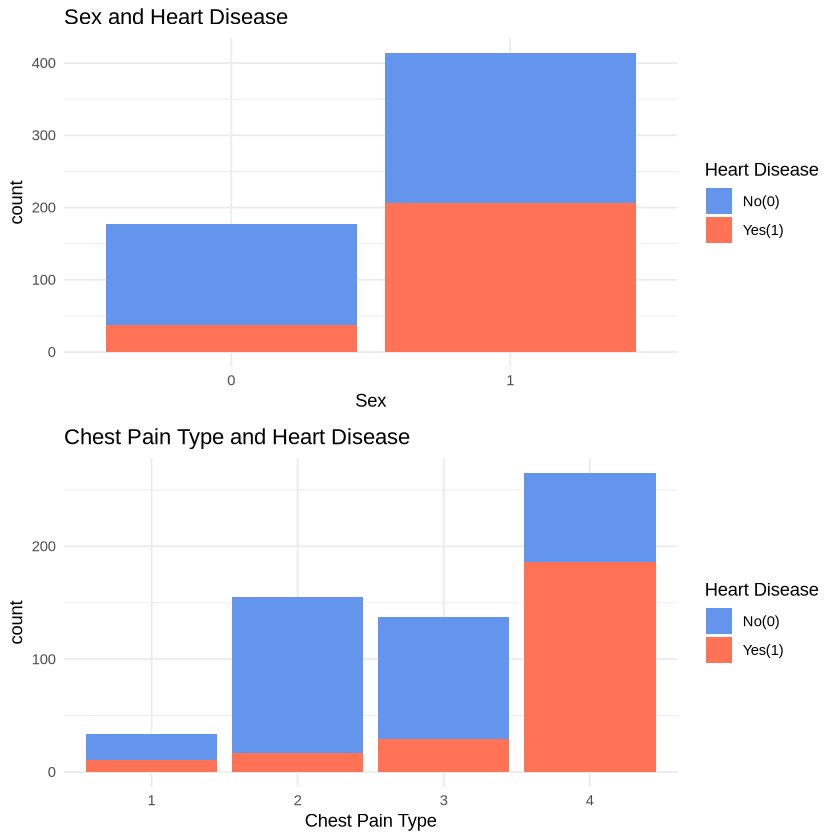

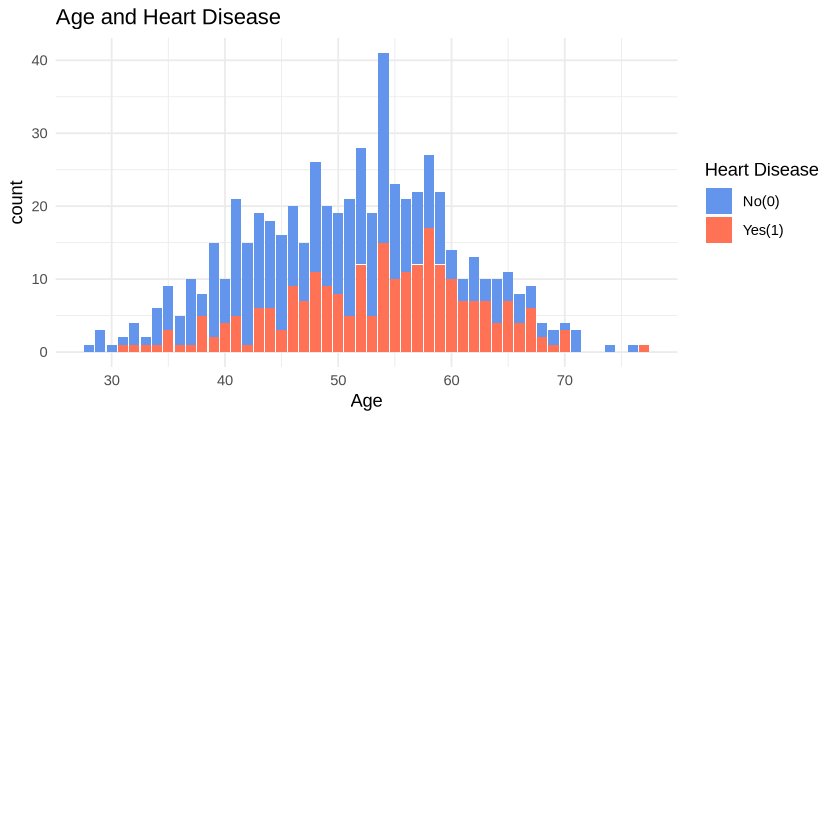

In [8]:
plot<- ggarrange(plot_1,plot_2,plot_3,ncol1=2,nrow=2)
plot

* The above 3 bar plots can show the distribution patterns and differences across categories, we can also see the different proportions for the presence or absence of heart disease, these variables may be stronger candidates for predictors.
* From plot 1 (Sex and Heart Disease), we can see that the proportion of having heart disease in male is higher than female.This can provide a quick, visualization if heart disease is more prevalent in one gender.
* From plot 2 (Chest Pain Type and Heart Disease), we can see that the asymptomatic(4) chest pain type are associated with higher heart disease presence.
* From plot 3 (Age and Heart Disease), we can see that age between 55-65 have a greater proportion of individuals with heart disease, which indicates the higher risk of having heart disease in older ages compared to younger ages.

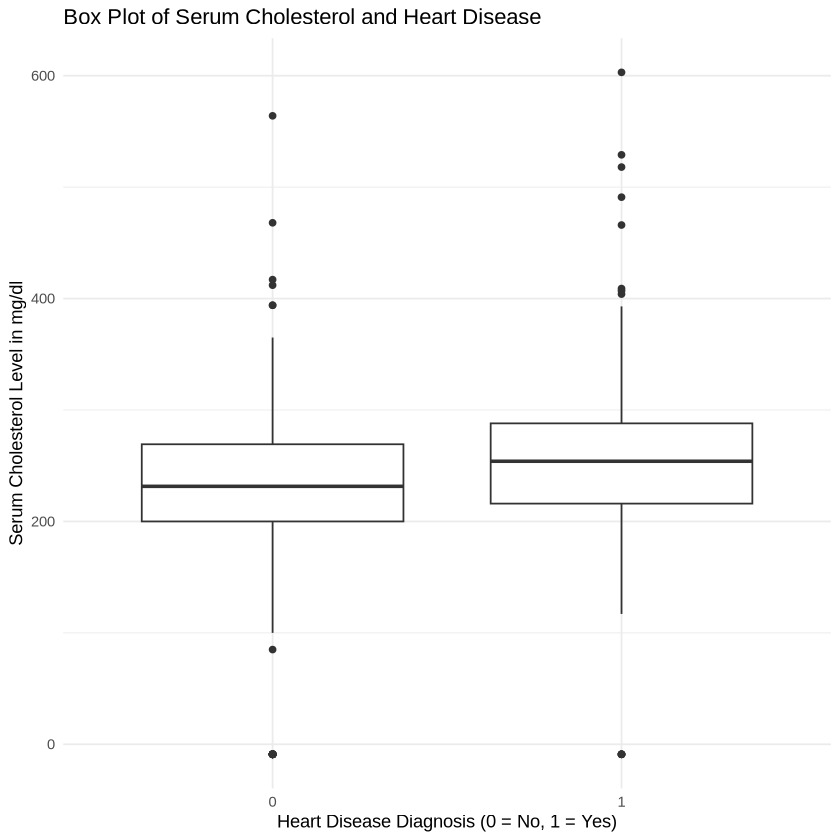

In [9]:
#Serum cholestoral and Heart Disease
plot_4 <- ggplot(heart_disease_data, aes(x = num, y = chol)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis (0 = No, 1 = Yes)", 
       y = "Serum Cholesterol Level in mg/dl", 
       title = "Box Plot of Serum Cholesterol and Heart Disease")+
  theme_minimal()
plot_4

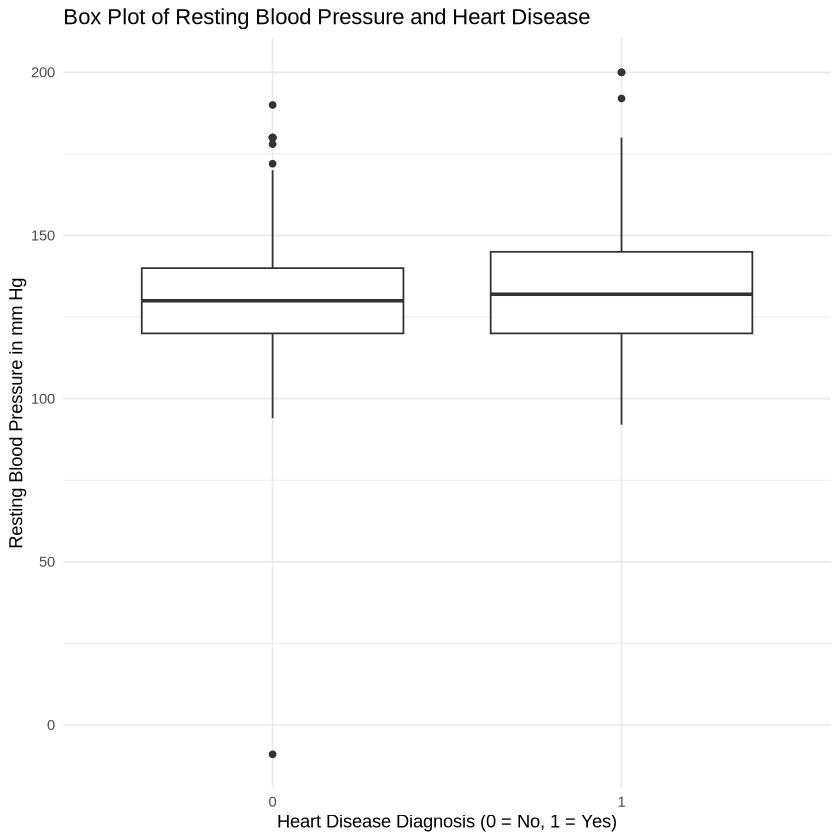

In [10]:
#Resting Blood Pressure and Heart Disease

plot_5 <- ggplot(heart_disease_data, aes(x = num, y = trestbps)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis (0 = No, 1 = Yes)", 
       y = "Resting Blood Pressure in mm Hg", 
       title = "Box Plot of Resting Blood Pressure and Heart Disease")+
  theme_minimal()
plot_5

* Boxplots are more effective for visualizing continuous variables grouped by categorical variables because they provide a clear and concise summary of the distribution for each category. So we will use boxplot for continuous variables (Serum cholestoral and Resting Blood Pressure) and compared between categorical variables(presence of heart disease 0 = absence, 1 = presence).
* From the boxplot of Serum Cholestoral and Heart Disease, we can see that there is a higher median cholesterol level in the presence with heart disease, this would suggest that high cholesterol might be associated with a greater risk of heart disease.
* From the boxplot of Resting Blood Pressure and Heart Disease, the mean of resting blood pressure is relatively similar across the two groups (presence and absence of heart disease), it may suggests that average blood pressure alone may not be a strong factor of heart disease.

# Individual Assignment 2

## Methods and Plan & Computational Code and Output

### Methods and Plan

* To answer our predictive research question: given the features of age, sex, chest pain types, serum cholesterol, and resting blood pressure of patients as predictors, can we predict the presence or absence of heart disease in patients? We will use the model selection method to select the best model between Ridge, LASSO and Ordinary regression by using cross-validation, which allow us to fit a logistic regression model while addressing multicollinearity and identifying the most relevant predictors, then use the model to make the prediction. This method is useful for predictive modelling and identify the classification of new observations. And logistic regression is appropriate for predicting a binary outcome response variable, giving the outcome as either 1 or 0. Moreover, it is more appropriate to use LASSO or Ridge logistic regression compare to a standard logistic regression model, because these regularization models are better to handle multicollinearity, potential overfitting issues. Therefore, these regularized approaches will help to improve the model’s predictive performance.

*  To apply this LASSO or Ridge logistic regression method, there are several assumptions are required, which include the linearity of relationships, since the LASSO and Ridge logistic regression are linear models, so we will assume there is a linear relationship between predictors and explanatory variables. And we will assume the residuals and errors are independent to avoid the biased estimates of coefficients and standard errors. Moreover, we will also use large sample size, so we combined two datasets to create a large sample, since these models are more stable when the size n is relatively large. Additionally, we will assume the residuals are normally distributed and non-zero variance in predictors. If a predictor have zero variance, then it provides no information to the model. And we will use cross-validation to identify the optimal value for 𝜆.

* Although LASSO or Ridge logistic regression method are used for predicting binary outcome variable, there are some potential limitations and weaknesses of this method, including less effective in terms of model interpretation, while LASSO performs explanatory variables selection by shrinking some coefficients to zero, it may exclude some other relevant predictors that correlated to others, making more challenge to interpret. And while Ridge penalizes coefficients, but it does not perform variables selections, so it includes all predictors, that may lead to a less interpretable model. Moreover,since these regularization models introduces bias to reduce variance, it may cause underfitting problems with poor performance on training and test sets due to simplistic relationships. Additionally, it has limitations with non-linearity relationship between predictors and binary outcome variables, since these methods assume a linear relationship between explanatory variables and response variable. And it also has some limitations in high-dimensional data, when variables are highly correlated, LASSO may have difficulty selecting the right subset of predictors and may exclude correlated variables. On the other hand, Ridge retains all predictors, including irrelevant ones, which reduces its ability to produce sparse models.

 ## Computational Code and Output

### Data Description

This heart disease dataset is based on the combination of Cleveland database and Hungarian database, the Cleveland dataset has been processed and the Hungarian database has been reprocessed. The dataset was downloaded from the UCI website. It contains 14 attributes. So the dataset consists of 14 columns representing features and variables related to heart disease and predicted attribute. The Cleveland dataset has 303 observations as selected patients, after dropped out the missing value in ca and thal, there are 297 patients. The Hungarian dataset has 294 patients. After combined two databases, there are total 591 patients as our observations. The "goal" field refers to the presence of heart disease in the patient as two outcomes 0 (absence) and 1(presence), we will treat the valued 1,2,3,4 as the outcome group 1 (the presence of heart disease). 

Name and type of variables:
* num (Categorical):Diagnosis of heart disease (1 = presence of heart disease; 0 = absence of heart disease)
* age (Integer):Age in years
* sex (Categorical):Sex (1 = male; 0 = female)
* cp (Categorical):Chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps (Integer):Resting blood pressure (in mm Hg on admission to the hospital)
* chol (Integer):Serum cholestoral in mg/dl
* fbs (Categorical): (Fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg (Categorical):Resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach (Integer):Maximum heart rate achieved
* exang (Categorical):Exercise induced angina (1 = yes; 0 = no)
* oldpeak (Integer):ST depression induced by exercise relative to rest
* slope (Categorical):The slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca (Integer):Number of major vessels (0-3) colored by flourosopy
* thal (Categorical):3 = normal; 6 = fixed defect; 7 = reversable defect

This heart disease dataset downloaded from UC Irvine Machine Learning Repository, it comes from the Cleveland database and it has been processed. The link to the dataset provided below.
Links: https://archive.ics.uci.edu/dataset/45/heart+disease

## Research Question

Given the features of age, sex, chest pain types, serum cholesterol, and resting blood pressure of patients, can we predict the presence or absence of heart disease in patients?

## Visualization and Plan

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


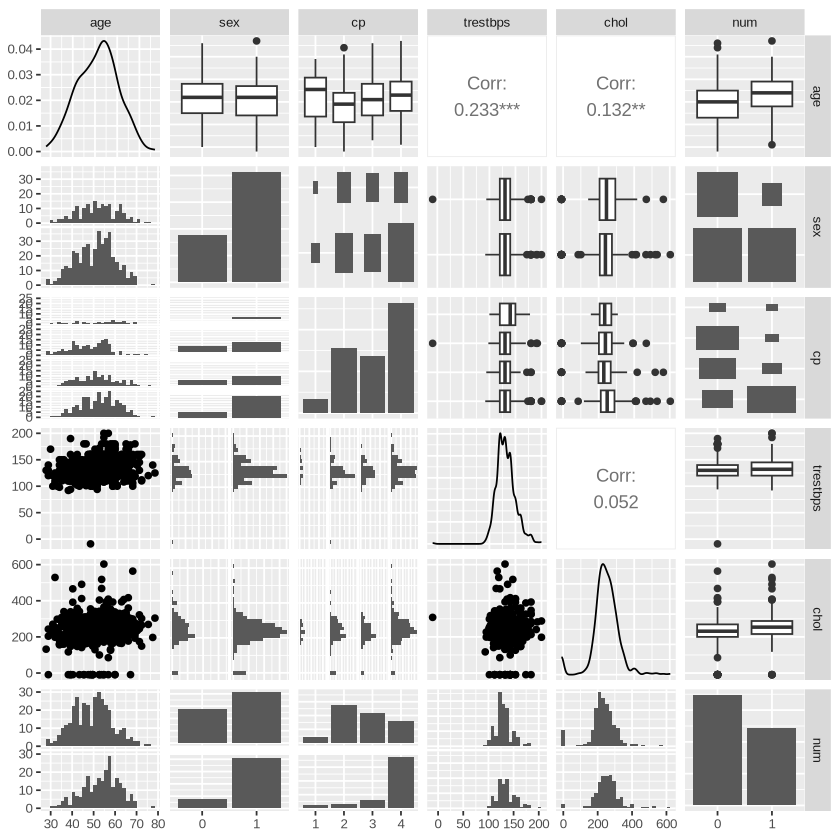

In [11]:
#ggpairs to see the relationships between variables and reponse variable(Heart Disease)
heart_disease_data_pairplots <- 
    heart_disease_data[, c("age", "sex", "cp","trestbps","chol","num")]%>%
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        
    )

heart_disease_data_pairplots

We will perform model selection to select the best model between Ridge and LASSO regressions to fit a logistic regression, and the process is invovling split the training and test sets and cross-validation, which allow us to fit a logistic regression model while addressing multicollinearity and identifying the most relevant predictors, then use the best model to make the prediction. Finally we will use the ROC plot to analyze the prediction accuracy of the results in order to answer our research question. 

## Implementation of a proposed model

In [12]:
library(repr)
library(infer)
library(gridExtra)
library(caret)
library(pROC)
library(boot)
library(glmnet)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


The following objects are masked from ‘package:faraway’:

    logit, melanoma




In [13]:
#Created training and test sets
set.seed(2024012)

heart_disease_train<- 
     heart_disease_data %>% 
    slice_sample(prop = 0.70)

heart_disease_test <- 
    heart_disease_data%>% 
    anti_join(heart_disease_train)

heart_disease_logistic_model <- 
    glm(
        formula = num ~ .,
        data = heart_disease_train,
        family = binomial)

ROC_full_log <- 
    roc(
        response = heart_disease_train$num, 
        predictor = predict(heart_disease_logistic_model, type = "response"))
ROC_full_log

Joining with `by = join_by(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
exang, oldpeak, slope, ca, thal, num)`
Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_disease_train$num, predictor = predict(heart_disease_logistic_model,     type = "response"))

Data: predict(heart_disease_logistic_model, type = "response") in 256 controls (heart_disease_train$num 0) < 157 cases (heart_disease_train$num 1).
Area under the curve: 0.9222

In [14]:
#Prepare model matrix for using glmnet
model_matrix_X_train <- 
    model.matrix(object = num ~ .,
                 data = heart_disease_train)[, -1]

matrix_Y_train <- 
    as.matrix(heart_disease_train$num, ncol = 1)

#### Ridge Regression

In [15]:
#Find the value of lambda that provide the largest AUC using cross-validation
set.seed(1234)
heart_disease_cv_lambda_ridge <- 
    cv.glmnet(
        x = model_matrix_X_train, 
        y = matrix_Y_train,
        alpha = 0,
        family = "binomial",
        type.measure = "auc",
        nfolds = 10)
heart_disease_cv_lambda_ridge


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 10, alpha = 0, family = "binomial") 

Measure: AUC 

    Lambda Index Measure      SE Nonzero
min   0.25    76  0.9096 0.01394      22
1se 244.42     2  0.8971 0.01565      22

In [16]:
#The Maximum average AUC out of the whole sequence for lambda
heart_disease_lambda_max_AUC_ridge <- round(heart_disease_cv_lambda_ridge$lambda.min, 4)

heart_disease_lambda_max_AUC_ridge

[1] 0.2502

In [17]:
#Use the optimal lambda that we found to fit the ridge regression model
heart_disease_ridge_max_AUC <- 
    glmnet(
        x = model_matrix_X_train, y = matrix_Y_train,
        alpha = 0,
        family = "binomial",
        lambda = heart_disease_lambda_max_AUC_ridge)

coef(heart_disease_ridge_max_AUC)

24 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) -1.5411583053
age          0.0046666399
sex1         0.5234460481
cp2         -0.4286325979
cp3         -0.2771070253
cp4          0.6632046673
trestbps    -0.0002385604
chol         0.0014915610
fbs1         0.0913475915
fbs-9       -0.0246731848
restecg1    -0.0525490619
restecg2     0.1061429265
restecg-9    1.6282700449
thalach     -0.0047045044
exang1       0.4832882330
exang-9      .           
oldpeak      0.2101153671
slope2       0.4854499738
slope3       0.1111429585
slope-9     -0.2121047176
ca           0.0057035649
thal6        0.3848687575
thal7        0.5987260336
thal-9       0.0081994788

#### Logistic (Ordinary) Regression Model

In [18]:
#Fit a logistic regression model
heart_disease_logistic_model <- 
    glm(
        formula = num ~ .,
        data = heart_disease_train,
        family = binomial)

summary(heart_disease_logistic_model)


Call:
glm(formula = num ~ ., family = binomial, data = heart_disease_train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.203803   2.551731  -2.039 0.041418 *  
age           0.011383   0.021571   0.528 0.597705    
sex1          1.709292   0.439147   3.892 9.93e-05 ***
cp2           0.184791   0.725538   0.255 0.798958    
cp3           0.560479   0.662251   0.846 0.397372    
cp4           2.366716   0.660133   3.585 0.000337 ***
trestbps     -0.010239   0.009696  -1.056 0.290935    
chol          0.004175   0.002224   1.877 0.060476 .  
fbs1          0.334316   0.510494   0.655 0.512540    
fbs-9        -0.002061   1.762826  -0.001 0.999067    
restecg1     -0.138298   0.618947  -0.223 0.823193    
restecg2      0.309784   0.428356   0.723 0.469561    
restecg-9    17.053414 882.743681   0.019 0.984587    
thalach      -0.001262   0.008365  -0.151 0.880056    
exang1        0.483473   0.389445   1.241 0.214443    
oldpeak       0.455639   0.2

In [19]:
#Check the misclassification_rate
misclassification_rate <- function(y, p.hat){
    y_hat <- round(p.hat, 0)
    y_num <- as.numeric(as.character(y))
    error_rate <- mean(abs(y_num - y_hat))
    return(error_rate)
}

error_rate_train <- 
    misclassification_rate(
        heart_disease_train$num,
        predict(heart_disease_logistic_model, type = "response"))

error_rate_train

[1] 0.1452785

Check that there is one new level for -9 under restecg, so we need to fix this issue because there is no -9 level in the test set, but is in the training set. Since it is inconsistent, so we have to fix this issue in order to calculate AUC_CV

In [20]:
levels(heart_disease_train$restecg)
table(heart_disease_train$restecg)

[1] "0"  "1"  "2"  "-9"


  0   1   2  -9 
265  37 110   1 

So We will directly drop out the -9 value in test data in order to be consistent with training set, so we can calculate AUC-CV for logistic regression 

In [21]:
#CV-AUC for a Logistic Regression (without penalization)
set.seed(2024012)
heart_disease_train <- heart_disease_train[heart_disease_train$restecg != "-9", ]

num.folds <- 10

folds <- createFolds(heart_disease_train$num, k=num.folds)

regr.cv <- NULL
for (fold in 1:num.folds) {
train.idx <- setdiff(1:nrow(heart_disease_train), folds[[fold]])
regr.cv[[fold]] <- glm(num ~ ., data=heart_disease_train, subset=train.idx,
                       family="binomial")
    }

pred.cv <- NULL
auc.cv <- numeric(num.folds) 

for (fold in 1:num.folds) {
test.idx <- folds[[fold]]
pred.cv[[fold]] <- data.frame(obs=heart_disease_train$num[test.idx],
pred=predict(regr.cv[[fold]], newdata=heart_disease_train, type="response")[test.idx])
auc.cv[fold] <- roc(obs ~ pred, data=pred.cv[[fold]])$auc
    }

heart_disease_cv_ordinary <- round(mean(auc.cv),7)

cat("Cross-validation AUC for the ordinary logistic model:", 
heart_disease_cv_ordinary)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Cross-validation AUC for the ordinary logistic model: 0.8893231

In [22]:
heart_disease_AUC_models <- 
    tibble(
        model = c("ordinary", "ridge"),
        auc = c(heart_disease_cv_ordinary, heart_disease_cv_lambda_ridge$cvm[heart_disease_cv_lambda_ridge$index[1]]))
heart_disease_AUC_models

model    auc      
1 ordinary 0.8893231
2 ridge    0.9096117

#### LASSO Regression Model

In [23]:
#Find the value of lambda in that provides the largest average AUC
set.seed(1234)

heart_disease_cv_lambda_LASSO <- cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = "binomial",
  type.measure = "auc",
  nfolds = 5
)

heart_disease_cv_lambda_LASSO


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.03465    23  0.9060 0.01635      10
1se 0.08784    13  0.8909 0.01302       6

In [24]:
#Find the highest lambda for which the model has an average AUC within one standard error of the maximum

heart_disease_lambda_1se_AUC_LASSO <- round(heart_disease_cv_lambda_LASSO$lambda.1se, 4)

heart_disease_lambda_1se_AUC_LASSO

[1] 0.0878

In [25]:
#Compare the LASSO logistic model fit at the lambda.1se with heart_disease_log_model and heart_disease_ridge_max_AUC
heart_disease_LASSO_1se_AUC <- 
    glmnet(
        x = model_matrix_X_train, 
        y = matrix_Y_train,
        alpha = 1,
        family = "binomial",
        lambda = heart_disease_lambda_1se_AUC_LASSO)

coef(heart_disease_LASSO_1se_AUC)

24 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) -1.7149372
age          .        
sex1         0.2142135
cp2          .        
cp3          .        
cp4          1.1437225
trestbps     .        
chol         .        
fbs1         .        
fbs-9        .        
restecg1     .        
restecg2     .        
restecg-9    .        
thalach      .        
exang1       0.3106938
exang-9      .        
oldpeak      0.1941688
slope2       0.4511161
slope3       .        
slope-9      .        
ca           .        
thal6        .        
thal7        0.5015449
thal-9       .        

Based on the results above, the estimated regression coefficients equal to zero are shown as ., the LASSO model will selected the variables: sex1,cp4,exang1,oldpeak,slope2,thal7

In [26]:
#Add the Lasso Logistic Regression row to our heart_disease_AUC_models tibble to compare three models 
heart_disease_AUC_models <- 
    heart_disease_AUC_models %>% 
    add_row(model = "lasso", auc = heart_disease_cv_lambda_LASSO$cvm[heart_disease_cv_lambda_LASSO$index["1se",]])

heart_disease_AUC_models

model    auc      
1 ordinary 0.8893231
2 ridge    0.9096117
3 lasso    0.8909028

From the above table, we can see the Ridge regression is slightly better. So we will choose to use Ridge model to the test set to estimate the model's prediction performance

Check that there is a new level "-9" under exang appears in test dataset, but not in training set, which caused error when make the predictions in the ordinary model

In [27]:
levels(heart_disease_test$exang)
table(heart_disease_test$exang)

[1] "0"  "1"  "-9"


  0   1  -9 
111  66   1 

In [28]:
#So we need to drop the level "-9" in the exang column, to ensure the same length and levels in training and test set
heart_disease_test <- heart_disease_test[heart_disease_test$exang != "-9", ]

In [29]:
#Predict the response variable(num) on test set

model_matrix_X_test <- 
    model.matrix(object = num ~ .,
                 data = heart_disease_test)[, -1]

#Use the roc function to obtain the ROC curve in the test set

ROC_Ridge <- roc(
  response = heart_disease_test$num,
  predictor = predict(heart_disease_ridge_max_AUC,
                      newx = model_matrix_X_test)[,"s0"] )


ROC_Ridge

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_disease_test$num, predictor = predict(heart_disease_ridge_max_AUC,     newx = model_matrix_X_test)[, "s0"])

Data: predict(heart_disease_ridge_max_AUC, newx = model_matrix_X_test)[, "s0"] in 91 controls (heart_disease_test$num 0) < 86 cases (heart_disease_test$num 1).
Area under the curve: 0.8923

#### We can also check how the other two models perform in the test set

In [30]:
ROC_LASSO <- roc(
  response = heart_disease_test$num,
  predictor = predict(heart_disease_LASSO_1se_AUC,
                      newx = model_matrix_X_test )[,"s0"] )


ROC_ordinary <- roc(
  response = heart_disease_test$num,
  predictor = predict(heart_disease_logistic_model,
                      newdata = heart_disease_test) )


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



### Visualization ROC Plot

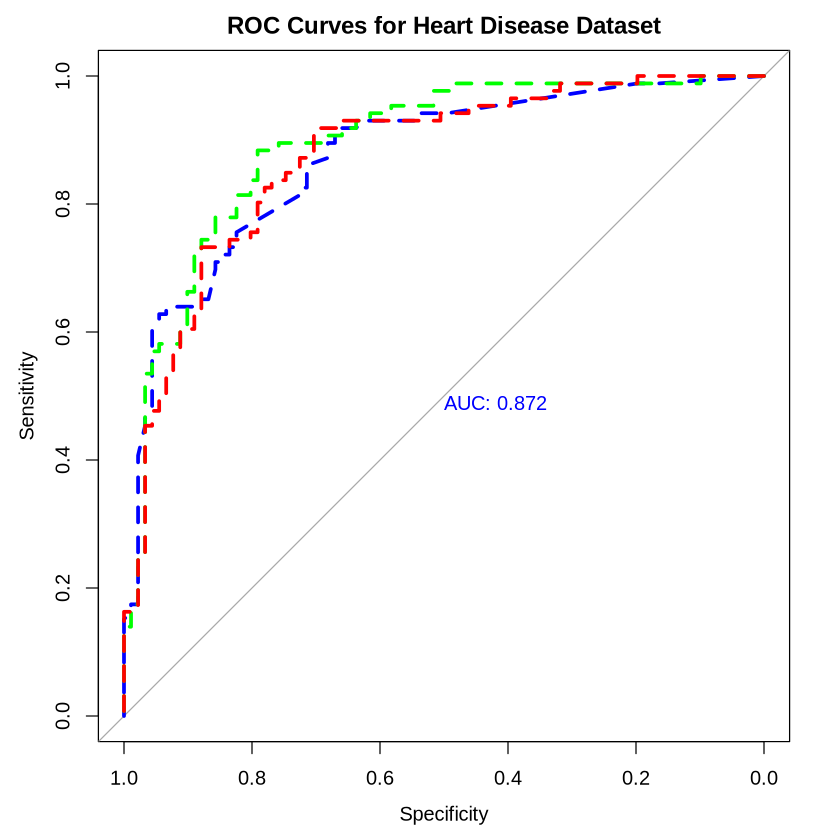

In [32]:
#Plot the ROC curve to compare 3 models prediction performance
plot(ROC_LASSO,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Heart Disease Dataset"
)

lines.roc(ROC_Ridge, col = "green", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ordinary, col = "red", lwd = 3, lty = 2)

### Results

From the ROC curve in the test set, the LASSO model performs worse. The Ridge model performs the best as what we see from the Heart_Disease_AUC_Models where we compared three models. The ROC curves illustrated that the Ridge regression model has the best prediction performance and higher accuracy. Since the Ridge model included all the predictors, we can see that the given features can be use to predict the presence of heart disease of patients.